In [1]:
""" Create a scatter plot of the losses with respect to the slice difference. """
import matplotlib.pyplot as plt
import numpy as np
import os


In [2]:
""" Read in the data from the filenames of the files inside test_plt_images folder """
def read_data():
    # Get the current working directory
    cwd = os.getcwd()
    # Get the path to the test_plt_images folder
    path = os.path.join(cwd, 'test_plt_images')
    # Get the list of files inside all subdirectories of the test_plt_images folder
    files = [os.path.join(dp, f) for dp, dn, filenames in os.walk(path) for f in filenames]
    # Create a list to store the data
    pred_slice_diffs = []
    pred_losses = []
    bi_slice_diffs = []
    bi_losses = [] 
    difference_between_losses = []
    all_slice_diffs = []
    all_pred_losses = []
    all_bi_losses = []

    biggest_slice_diff_folder = ''
    biggest_slice_diff_img_name = ''
    biggest_slice_diff = 0
    # Loop through the files
    for file in files:
        # Read the filename
        filename = os.path.basename(file)
        # Split the filename by the underscore
        filename_split = filename.split('_')
        # Get the slice difference
        slice_diff = float(filename_split[3])
        # Get the pred_loss
        pred_loss = float(filename_split[6])
        # Get the bi_loss
        bi_loss = float(filename_split[9][:-4])

        # Append the data to the lists
        
        # only append lower of the two loss
        if pred_loss < bi_loss:
            pred_slice_diffs.append(slice_diff)
            pred_losses.append(pred_loss)
        else:
            bi_slice_diffs.append(slice_diff)
            bi_losses.append(bi_loss)

        # find abs difference between losses
        difference_between_losses.append(abs(pred_loss - bi_loss))
        all_slice_diffs.append(slice_diff)

        all_pred_losses.append(pred_loss)
        all_bi_losses.append(bi_loss)

        # find biggest slice diff
        if slice_diff > biggest_slice_diff:
            biggest_slice_diff = slice_diff
            biggest_slice_diff_folder = os.path.dirname(file)
            biggest_slice_diff_img_name = filename

    # Convert the data to np
    pred_slice_diffs = np.array(pred_slice_diffs)
    pred_losses = np.array(pred_losses)
    bi_slice_diffs = np.array(bi_slice_diffs)
    bi_losses = np.array(bi_losses)
    difference_between_losses = np.array(difference_between_losses)
    all_slice_diffs = np.array(all_slice_diffs)

    # Print the biggest slice diff
    print('Biggest slice diff: ', biggest_slice_diff)
    print('Biggest slice diff folder: ', biggest_slice_diff_folder)
    print('Biggest slice diff img name: ', biggest_slice_diff_img_name)
    # Return the data
    return pred_slice_diffs, pred_losses, bi_slice_diffs, bi_losses, difference_between_losses, all_slice_diffs, all_pred_losses, all_bi_losses

In [3]:
""" Create a scatter plot of the losses with respect to the slice difference. """
def create_scatter_plot(pred_slice_diffs, pred_losses, bi_slice_diffs, bi_losses):
    # Create a figure
    fig = plt.figure()
    # Create a subplot
    ax = fig.add_subplot(111)
    # Create a scatter plot of the losses with respect to the slice difference
    # have good colorblind and grayscale contrast
    c1 = '#003f5c'
    c2 = '#ffa600'


    ax.scatter(pred_slice_diffs, pred_losses, label='pred',s=1,c=c1,marker='*')
    ax.scatter(bi_slice_diffs, bi_losses, label='bi',s=1,c=c2,marker='v')
    # Set the title
    ax.set_title('Best interpolater with respect to slice difference')
    # Set the x label
    ax.set_xlabel('Slice difference')
    # Set the y label
    ax.set_ylabel('Best Classifier\'s Loss')
    # Set the legend
    ax.legend()
    # Show the plot
    plt.show()


Biggest slice diff:  4.20391845703125
Biggest slice diff folder:  c:\Users\gunnerstone\Desktop\DBT_VFIT_Interpolation\test_plt_images\DBT_Sample_48
Biggest slice diff img name:  Patch_52_ImgDiff_4.20391845703125_Pred_Loss_0.009284710511565208_Bi_Loss_0.009332951158285141.png


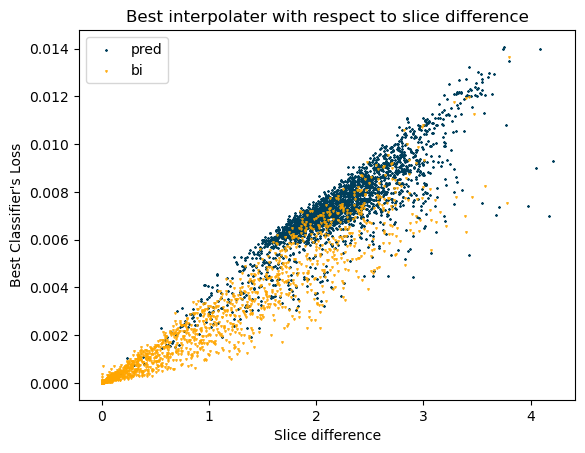

In [4]:
# Get the data
pred_slice_diffs, pred_losses, bi_slice_diffs, bi_losses, difference_between_losses, all_slice_diffs, all_pred_losses, all_bi_losses = read_data()
# Create a scatter plot of the losses with respect to the slice difference
create_scatter_plot(pred_slice_diffs, pred_losses, bi_slice_diffs, bi_losses)

In [5]:
""" Create a scatter plot of the difference between losses with respect to the slice difference. """
def create_scatter_plot_difference(difference_between_losses, all_slice_diffs):
    # Create a figure
    fig = plt.figure()
    # Create a subplot
    ax = fig.add_subplot(111)
    # Create a scatter plot of the losses with respect to the slice difference
    ax.scatter(all_slice_diffs, difference_between_losses,s=1)
    # Set the title
    ax.set_title('Difference between losses with respect to slice difference')
    # Set the x label
    ax.set_xlabel('Slice difference')
    # Set the y label
    ax.set_ylabel('Difference between losses')
    # Show the plot
    plt.show()

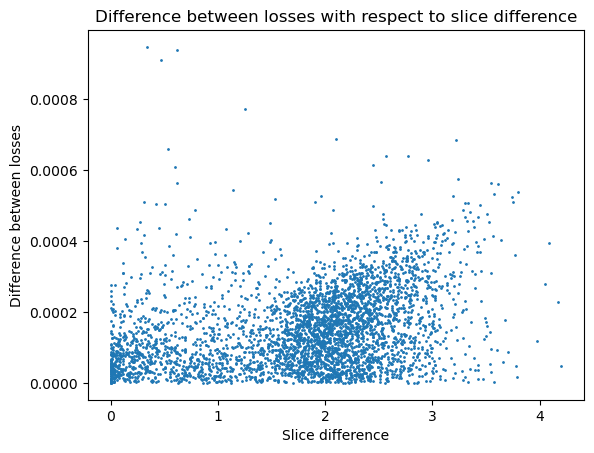

In [6]:
# Create a scatter plot of the difference between losses with respect to the slice difference
create_scatter_plot_difference(difference_between_losses, all_slice_diffs)

In [7]:
""" Create a histogram of the distribution of all_slice_diffs. """
def create_histogram(all_slice_diffs):
    import seaborn as sns
    sns.distplot(all_slice_diffs, hist=True, kde=True,
                bins=int(180/5), color = 'darkblue',
                hist_kws={'edgecolor':'black'},
                kde_kws={'linewidth': 4})
    # label the axes
    plt.xlabel('Slice difference')
    plt.ylabel('Test-Set Sample Density')

    # find both means of the binomial distribution
    mean = np.mean(all_slice_diffs)
    median = np.median(all_slice_diffs)
    
    plt.show()

c:\Users\gunnerstone\.conda\envs\treely\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


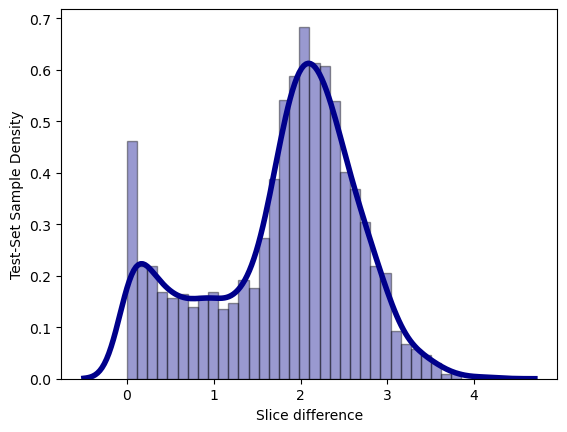

In [8]:
# Create a histogram of the distribution of all_slice_diffs
create_histogram(all_slice_diffs)

In [9]:
""" Print out the mean and standard deviation of the losses. With scientific notation."""
def print_mean_std(pred_losses, bi_losses):
    # Print the mean and standard deviation of the losses with e+2 notation
    print('Mean of pred losses: {:.2e}'.format(np.mean(pred_losses)))
    print('Std of pred losses: {:.2e}'.format(np.std(pred_losses)))
    print('Mean of bi losses: {:.2e}'.format(np.mean(bi_losses)))
    print('Std of bi losses: {:.2e}'.format(np.std(bi_losses)))
    print("avg of means: {:.2e}".format(np.mean([np.mean(pred_losses), np.mean(bi_losses)])))
    print("avg of stds: {:.2e}".format(np.mean([np.std(pred_losses), np.std(bi_losses)])))
    

# Print out the mean and standard deviation of the losses
print_mean_std(all_pred_losses, all_bi_losses)


Mean of pred losses: 5.68e-03
Std of pred losses: 2.97e-03
Mean of bi losses: 5.74e-03
Std of bi losses: 3.09e-03
avg of means: 5.71e-03
avg of stds: 3.03e-03


In [10]:
# Print out the mean and standard deviation of the losses
print_mean_std(pred_losses, bi_losses)


Mean of pred losses: 7.28e-03
Std of pred losses: 1.79e-03
Mean of bi losses: 2.90e-03
Std of bi losses: 2.58e-03
avg of means: 5.09e-03
avg of stds: 2.19e-03


3922
3922
Mean loss: 5.65e-03
Std dev: 3.00e-03


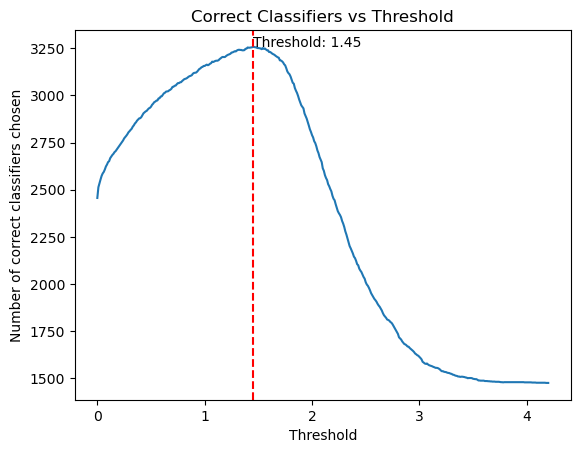

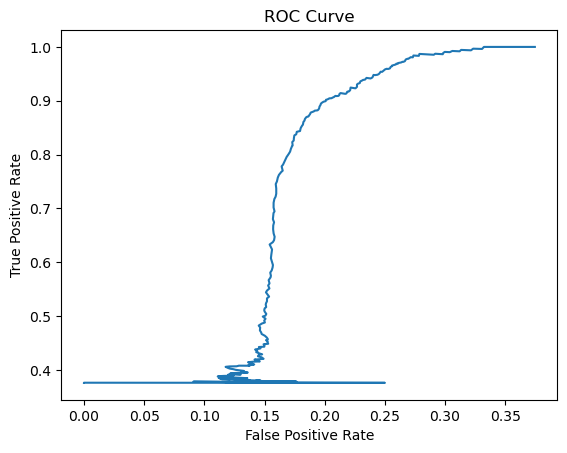

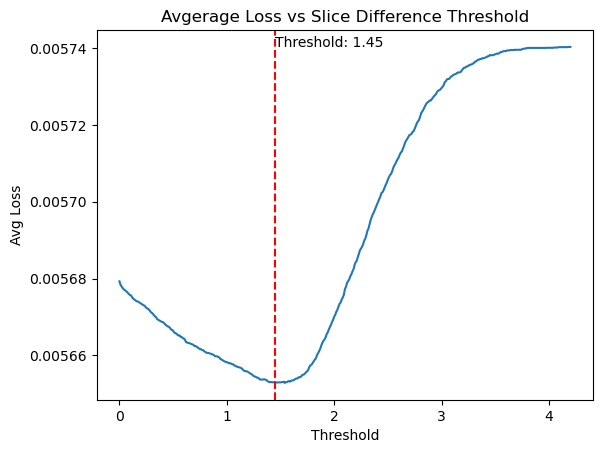

In [22]:
# make a dictionary of all losses and their slice differences
all_losses = {'pred_losses': all_pred_losses, 'bi_losses': all_bi_losses, 'all_slice_diffs': all_slice_diffs}

# print length of pred losses and bi losses
print(len(all_losses['pred_losses']))
print(len(all_losses['bi_losses']))


TP = []
TN = []
FP = []
FN = []

total_correct = []

mean_losses = []
std_devs = []
theshold_values = []

# define a threshold for the slice difference to choose the best interpolater
for threshold in np.arange(min(all_losses['all_slice_diffs']), max(all_losses['all_slice_diffs']), .01):
    # get the indices of the slice differences that are less than the threshold
    bi_indices = np.where(all_losses['all_slice_diffs'] <= threshold)
    pred_indices = np.where(all_losses['all_slice_diffs'] > threshold)

    bi_losses = np.array(all_losses['bi_losses'])
    pred_losses = np.array(all_losses['pred_losses'])

    # get the losses that are less than the threshold and choose bilinear
    num_bi_correct = len(np.where(bi_losses[bi_indices] < pred_losses[bi_indices])[0])
    num_bi_incorrect = len(np.where(bi_losses[bi_indices] > pred_losses[bi_indices])[0])
    
    # get the losses that are greater than the threshold and choose pred
    num_pred_correct = len(np.where(pred_losses[pred_indices] < bi_losses[pred_indices])[0])
    num_pred_incorrect = len(np.where(pred_losses[pred_indices] > bi_losses[pred_indices])[0])

    bi_losses = bi_losses[bi_indices]
    pred_losses = pred_losses[pred_indices]

    true_positive = num_bi_correct
    true_negative = num_pred_correct
    false_negative= num_bi_incorrect
    false_positive = num_pred_incorrect

    total_correct.append(true_positive + true_negative)
    
    TP.append(true_positive)
    TN.append(true_negative)
    FP.append(false_positive)
    FN.append(false_negative)

    # append bi_losses and pred_losses
    total_losses = np.append(bi_losses, pred_losses)

    mean_losses.append(np.mean(total_losses))
    # std_devs.append(np.mean([np.std(bi_losses), np.std(pred_losses)]))
    theshold_values.append(threshold)

    if(threshold==1.45):
        # print the mean_loss and std_dev
        print('Mean loss: {:.2e}'.format(np.mean(total_losses)))
        print('Std dev: {:.2e}'.format(np.mean([np.std(total_losses)])))

# plot the TP and threshold
plt.plot(np.arange(min(all_losses['all_slice_diffs']), max(all_losses['all_slice_diffs']), .01), total_correct)
# find the maximum TP and the corresponding threshold value and draw and label a vertical line
max_TP = max(total_correct)
max_TP_index = total_correct.index(max_TP)
threshold = np.arange(min(all_losses['all_slice_diffs']), max(all_losses['all_slice_diffs']), .01)[max_TP_index]
plt.axvline(x=threshold, color='r', linestyle='--')
plt.text(threshold, max_TP, 'Threshold: {:.2f}'.format(threshold))

plt.xlabel('Threshold')
plt.ylabel('Number of correct classifiers chosen')
plt.title('Correct Classifiers vs Threshold')
plt.show()



# wipe the plot
plt.clf()


# calculate TPR and FPR
TPR = np.array(TP) / (np.array(TP) + np.array(FN))
FPR = np.array(FP) / (np.array(FP) + np.array(TN))

# plot the ROC curve
plt.plot(FPR, TPR)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()



# wipe the plot
plt.clf()
# plot the loss means and std devs vs threshold
plt.plot(theshold_values, mean_losses)
plt.axvline(x=threshold, color='r', linestyle='--')
plt.text(threshold, max(mean_losses), 'Threshold: {:.2f}'.format(threshold))
plt.xlabel('Threshold')
plt.ylabel('Avg Loss')
plt.title('Avgerage Loss vs Slice Difference Threshold')
plt.show()

